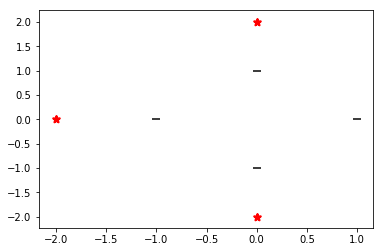

In [67]:
from matplotlib.mlab import griddata
from numpy.linalg import inv
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

X1 = [0, 0, -2]
Y1=[2, -2, 0]
X2 = [1, 0, 0, -1]
Y2 = [0, 1, -1, 0]


#label the data
data1 = [np.array([X1[i],Y1[i],1]) for i in range(3)]
data2 = [np.array([X2[i],Y2[i],-1]) for i in range(4)]
data = data1 + data2


#Plotting the Inputs
plt.scatter(X2, Y2, s=50, marker='_', linewidths=2, color='black')
plt.scatter(X1, Y1, s=50, marker='*', linewidths=2, color='red')
plt.show()



# BELOW IS SOLUTION TO PROBLEM 6.1(a)

In [68]:

#Question : Show the decision regions for the 1-NN and 3-NN rules.

#Extracting Input Vector X and corresponding Label Y from Data

X_PTS=np.array(data)[:,:2]  
print(X_PTS)
Y_PTS= np.array(data)[:,2:3]

kNeighbors = KNeighborsClassifier(n_neighbors=1)
kNeighbors.fit(X_PTS,Y_PTS)


[[ 0  2]
 [ 0 -2]
 [-2  0]
 [ 1  0]
 [ 0  1]
 [ 0 -1]
 [-1  0]]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

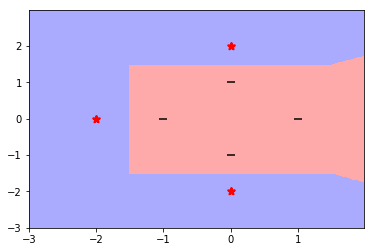

In [69]:
# Plot the decision boundary. For that, assign a color to each point in the mesh [x_min, x_max] x [y_min, y_max].
from matplotlib.colors import ListedColormap
h = .02
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X_PTS[:, 0].min() - 1, X_PTS[:, 0].max() + 1
y_min, y_max = X_PTS[:, 1].min() - 1, X_PTS[:, 1].max() + 1
XX, YY = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = kNeighbors.predict(np.c_[XX.ravel(), YY.ravel()])
    
    
# Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.figure()
plt.pcolormesh(XX, YY, Z, cmap=cmap_light)


plt.scatter(X2, Y2, s=50, marker='_', linewidths=2, color='black')
plt.scatter(X1, Y1, s=50, marker='*', linewidths=2, color='red')
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


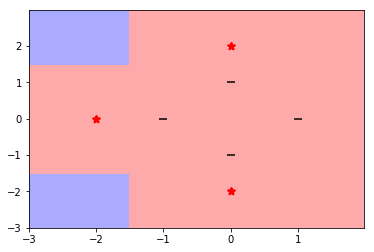

In [70]:
kNeighbors = KNeighborsClassifier(n_neighbors=3)

kNeighbors.fit(X_PTS,Y_PTS)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
from matplotlib.colors import ListedColormap
h = .02
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = X_PTS[:, 0].min() - 1, X_PTS[:, 0].max() + 1
y_min, y_max = X_PTS[:, 1].min() - 1, X_PTS[:, 1].max() + 1
XX, YY = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
Z = kNeighbors.predict(np.c_[XX.ravel(), YY.ravel()])
    
     # Put the result into a color plot
Z = Z.reshape(XX.shape)
plt.figure()
plt.pcolormesh(XX, YY, Z, cmap=cmap_light)


plt.scatter(X2, Y2, s=50, marker='_', linewidths=2, color='black')
plt.scatter(X1, Y1, s=50, marker='*', linewidths=2, color='red')
plt.show()



#  BELOW IS SOLUTION TO PROBLEM 6.1(b)

In [71]:

#Question : Show the classification regions in the x-space for the 1-NN and 3-NN rules 
#           implemented on the data in the z-space.

import math

Z1=[]
Z2=[]
print(X_PTS)
#-------------- Z1 & Z2 feature --------------
def conversion(X_PTS):
    for i in range(len(X_PTS)):
        x1=X_PTS[i:i+1,0:1]
        x2=X_PTS[i:i+1,1:2]
        Z1.append(math.sqrt( (x1**2) + (x2**2) ))
        if x1==0 and x2>0:
            Z2.append((math.pi) / 2)
        elif x1==0 and x2<0:
            Z2.append(- (math.pi)/ 2)
        else:
            Z2.append(math.atan(x2/x1))
    return Z1, Z2
    
Z1, Z2 = conversion(X_PTS)

    
print(Z1)
print(Z2)



#labeling the data
data1 = [np.array([Z1[i],Z2[i],1]) for i in range(3)]
data2 = [np.array([Z1[3+i],Z2[3+i],-1]) for i in range(4)]
data = data1 + data2
print(data)

from sklearn.neighbors import KNeighborsClassifier

#Input vector
X_z = np.array(data)[:,:2]     

#Labels corresponding to the input vector
Y_z = np.array(data)[:,2:3]     

#Calculating for N = 1

kNeighbors_z = KNeighborsClassifier(n_neighbors=1)
kNeighbors_z.fit(X_z,Y_z)





[[ 0  2]
 [ 0 -2]
 [-2  0]
 [ 1  0]
 [ 0  1]
 [ 0 -1]
 [-1  0]]
[2.0, 2.0, 2.0, 1.0, 1.0, 1.0, 1.0]
[1.5707963267948966, -1.5707963267948966, -0.0, 0.0, 1.5707963267948966, -1.5707963267948966, -0.0]
[array([2.        , 1.57079633, 1.        ]), array([ 2.        , -1.57079633,  1.        ]), array([ 2., -0.,  1.]), array([ 1.,  0., -1.]), array([ 1.        ,  1.57079633, -1.        ]), array([ 1.        , -1.57079633, -1.        ]), array([ 1., -0., -1.])]


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:49: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

(250, 250)
(250, 250)


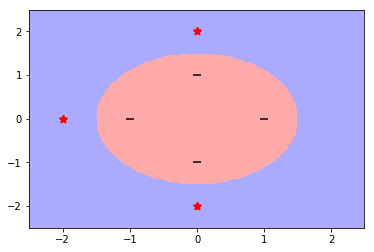

In [72]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
from matplotlib.colors import ListedColormap
h = .02
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = -2.5,2.5# X_z[:, 0].min() - 1, X_z[:, 0].max() + 1
y_min, y_max = -2.5,2.5#X_z[:, 1].min() - 1, X_z[:, 1].max() + 1
XX, YY = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
XX_Z=[]
YY_Z=[]

print(XX.shape)
print(YY.shape)

def conversion(XX, YY):
    for i in range(len(XX)):
        for j in range(len(YY)):
            XX_Z.append(math.sqrt( (XX[i][j]**2) + (YY[i][j]**2) ))
            if XX[i][j]==0 and YY[i][j]>0:
                YY_Z.append((math.pi) / 2)
            elif XX[i][j]==0 and YY[i][j]<0:
                YY_Z.append(- (math.pi)/ 2)
            else:
                YY_Z.append(math.atan(YY[i][j]/XX[i][j]))
    return XX_Z, YY_Z


#Converting/Transforming each point in X-Y plane
XX_Z, YY_Z = conversion(XX,YY)

X_z = np.array([XX_Z])
Y_z = np.array([YY_Z])
        

XY = kNeighbors_z.predict(np.c_[X_z.ravel(), Y_z.ravel()])

    
# Put the result into a color plot
XY = XY.reshape(XX.shape)
plt.figure()
plt.pcolormesh(XX, YY, XY, cmap=cmap_light)


plt.scatter(X2, Y2, s=50, marker='_', linewidths=2, color='black')
plt.scatter(X1, Y1, s=50, marker='*', linewidths=2, color='red')
plt.show()

# Running the same algorithm as above for N = 3

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if sys.path[0] == '':


(300, 300)
(300, 300)


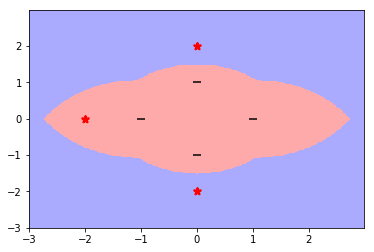

In [73]:
from sklearn.neighbors import KNeighborsClassifier

#Input vector
X_z = np.array(data)[:,:2]     

#Labels corresponding to the input vector
Y_z = np.array(data)[:,2:3]     

#Calculating for N = 3

kNeighbors_z = KNeighborsClassifier(n_neighbors=3)
kNeighbors_z.fit(X_z,Y_z)


# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
from matplotlib.colors import ListedColormap
h = .02
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

x_min, x_max = -3,3# X_z[:, 0].min() - 1, X_z[:, 0].max() + 1
y_min, y_max = -3,3#X_z[:, 1].min() - 1, X_z[:, 1].max() + 1
XX, YY = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
XX_Z=[]
YY_Z=[]

print(XX.shape)
print(YY.shape)

def conversion(XX, YY):
    for i in range(len(XX)):
        for j in range(len(YY)):
            XX_Z.append(math.sqrt( (XX[i][j]**2) + (YY[i][j]**2) ))
            if XX[i][j]==0 and YY[i][j]>0:
                YY_Z.append((math.pi) / 2)
            elif XX[i][j]==0 and YY[i][j]<0:
                YY_Z.append(- (math.pi)/ 2)
            else:
                YY_Z.append(math.atan(YY[i][j]/XX[i][j]))
    return XX_Z, YY_Z


#Converting/Transforming each point in X-Y plane
XX_Z, YY_Z = conversion(XX,YY)

X_z = np.array([XX_Z])
Y_z = np.array([YY_Z])
        

XY = kNeighbors_z.predict(np.c_[X_z.ravel(), Y_z.ravel()])

    
# Put the result into a color plot
XY = XY.reshape(XX.shape)
plt.figure()
plt.pcolormesh(XX, YY, XY, cmap=cmap_light)


plt.scatter(X2, Y2, s=50, marker='_', linewidths=2, color='black')
plt.scatter(X1, Y1, s=50, marker='*', linewidths=2, color='red')
plt.show()